<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 2
#### Autor: Yañez $\lambda$, Joaquin

En este archivo se resolverá la tarea semanal enviada, la mayor parte del desarrollo esta realizada en hoja y se presentará en formato PDF, también se podrán encontrar las simulaciones necesarias, las respuestas a las preguntas teóricas y algunas aclaraciones necesarias.

El circuito a analizar era el siguiente:

<img src="./circuito.png" > 



## 1. Obtención de la transferencia

In [1]:
from IPython.display import IFrame
IFrame("./TS2.pdf", width=800, height=800)

## 2. Norma de frecuencia y sensibilidades
Para la norma de frecuencia se utilizó como parámetro $\frac{1}{R3}$ ya que tanto el factor de calidad, la pulsación angular y la ganancia del filtro dependen del valor de esta resistencia, y si ademas se normaliza en frecuencia y se define un Q específico como en este caso, todos los componentes quedan con su valor definido, simplificando asi el cálculo en la implementación del circuito. 

Por otro lado, se analizo la sensibilidad de $\omega_0$ con respecto a C, en este caso vemos que si el valor del capacitor se desvía, la frecuencia de corte **decrecerá** en igual medida. Por otro lado, el factor de calidad Q tiene la misma sensibilidad que la frecuencia con respecto a R2 y con respecto a R3, el factor de calidad **aumentará** en igual medida que la variación de esta resistencia.



## 3. Simulación de la transferencia normalizada en python

In [2]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

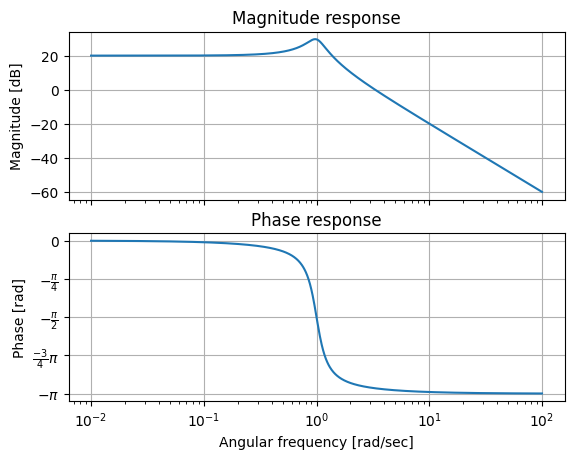

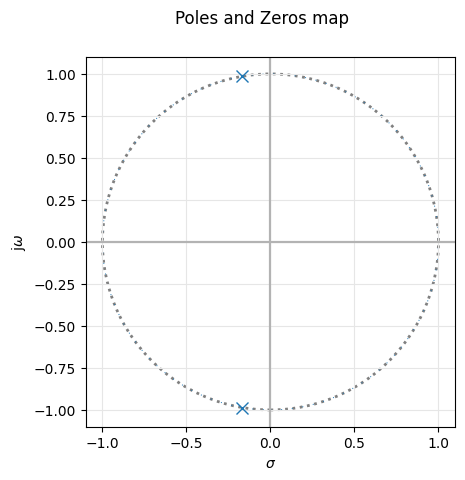

In [3]:
R1 = 1/10
R2 = 3
R3 = R4 = 1
C = 1

w0 = 1/(C*R3)
k = R3/R1
Q = R2*R3*C**2

my_tf = TransferFunction( [k], [1 , 1/Q , 1] )
bodePlot(my_tf, fig_id=1)
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

## 4. Simulación de la transferencia sin normalizar
A continuación se simulará la transeferencia desnormalizando con los siguientes valores:
$\Omega_z = \frac{1}{R3} = 1000, \Omega_w = 1000 \frac{rad}{s}$

La razon por la que se simula el circuito desnormalizado es principalmente para comprobar que la forma de la transferencia no se verá modificada por esto sino que simplemente se desplazarán los valores del eje de frecuencia.

La simulación se realizará en Spice, como esta vez es desnormalizada el resultado debería dar con la misma forma pero con el máximo en el nuevo w0

## Simulación en LTSpice

A continuación se muestra el circuito simulado y su correspondiente resultado, cabe aclarar que como se realiza un análisis frecuencial y la entrada de tensión es una senoidal de amplitud 1 y fase 0, la salida V0 ya representa la transferencia del circuito.

<img src="./esquematicoTs2.png" /> 
<img src="./simulacionTs2.png" /> 

Se observa como la forma es la misma que se obtuvo antes en python, cabe aclarar que si bien se calculó un $\omega_0 = 1000$ como el eje de Spice esta en hertz la nueva frecuencia será $f_0 = \frac{\omega_0}{2\pi} \approx 160 Hz$

## 5. Simulación del filtro butterworth

Como se analizó en papel si le asignamos a R2 un valor de $\frac{1}{\sqrt{2}}$ conseguimos la transferencia de un filtro butterworth normalizado, el próximo script simulará esta transferencia.

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

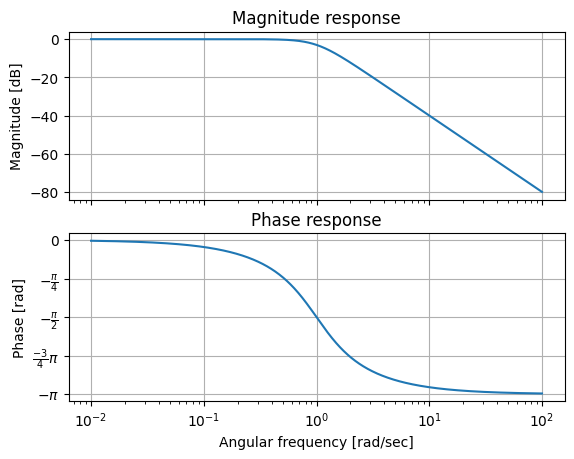

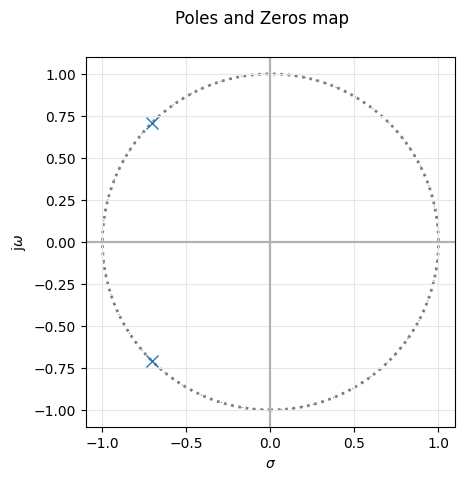

In [4]:
R1 = 1
R2 = np.sqrt(2)/2
R3 = R4 = 1
C = 1

w0 = 1/(C*R3)
k = R3/R1
Q = R2*R3*C**2

my_tf = TransferFunction( [k], [1 , 1/Q , 1] )
bodePlot(my_tf, fig_id=1)
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

En la simulación observamos como era de esperar que los polos estan exactamente a 45° con respecto al semieje negativo de sigma como corresponde en una transferencia butterworth

## 6. Obtención de un circuito pasabanda.

A partir de esta misma configuración circuital, podriamos obtener un circuito "pasabanda", un poco degenerado ya que la atenuación antes de $\omega_0$ sería constante pero controlable con el valor de R1, cuanto mas grande sea este con respecto a R3 (la norma de frecuencia empleada) mayor será la atenuación antes de la pulsación angular del circuito. 

Por otro lado se tendrá una gran ganancia cerca de la frecuencia natural del circuito. Para conseguir esto lo que se debe hacer es aumentar considerablemente el factor de calidad del circuito. Este parámetro depende exclusivamente de R2 gracias a la normalización de impedancia que tomamos, por lo que solo basta con agrandar su valor para ver estos efectos como se muestra en la siguiente simulación

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

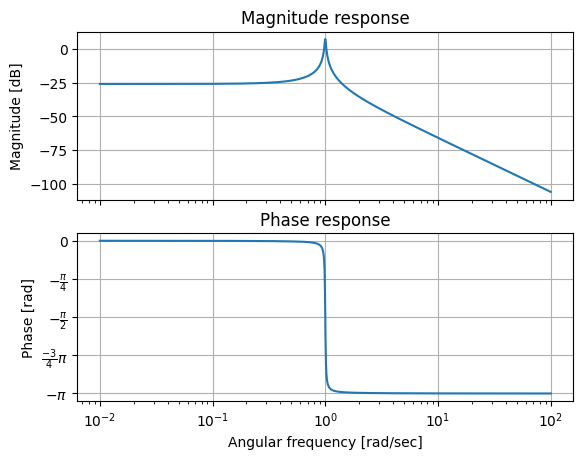

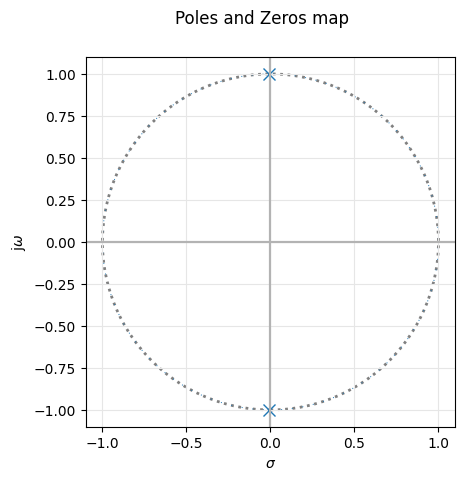

In [5]:
R1 = 20
R2 = 50
R3 = R4 = 1
C = 1

w0 = 1/(C*R3)
k = R3/R1
Q = R2*R3*C**2

my_tf = TransferFunction( [k], [1 , 1/Q , 1] )
bodePlot(my_tf, fig_id=1)
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

Es evidente como la transferencia corresponde a un pasa bandas bastante bueno, cabe resaltar también como al aumentar el Q los polos del sistema se acercan mucho al eje $j\omega$ lo que pone en riesgo la estabilidad del circuito.

## 7. Conclusiones

En base a todo lo analizado vemos como esta estructura circuital tiene un gran valor, con 3 OPAMPS se consigue un filtro pasabajos muy bueno, con una gran planicidad en su banda de paso y además que en base a los parámetros elegidos se puede llegar a confeccionar un filtro pasabanda incluso. Por otro lado viendo las sensibilidades del circuito vemos que tiene buena estabilidad ya que los desvíos en los valores de los componentes afectan a los parámetros de manera lineal (ya sea proporcionalmente o inversamente dependiendo el caso) por lo que tampoco implica un riesgo tan grande usar componentes que no sean tan precisos.

Por otro lado, cabe destacar la ventaja de esta configuración con respecto a la configuración Tow-Thomas ya que esta utiliza el tercer OPAMP simplemente para invertir la señal, por lo que los integradores son peores y mas sensibles a presentar polos parásitos en altas frecuencias, mientras que en esta configuración el tercer OPAMP no solo que ayuda a no invertir la señal de salida sino que también mejora la performance del integrador. En comparación al Sallen-Key esta configuración resulta ser mejor ya que su sensibilidad es mucho menor a la del Sallen-Key la cual AMPLIFICA los errores de los componentes en el valor de los parámetros del circuito, aunque esta es mucho mas fácil de implementar ya que consta de un solo OPAMP.